# Описание задания

**Цель лабораторной работы:** изучение линейных моделей, SVM и деревьев решений.

## Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите 1) одну из линейных моделей, 2) SVM и 3) дерево решений. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
5. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
6. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

# Ход выполнения лабораторной работы

## Выбор датасета


В качестве исходных данных выбираем датасет Heart Disease UCI (https://www.kaggle.com/ronitf/heart-disease-uci).

In [54]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
os.listdir()
data = pd.read_csv('heart.csv', sep=",")

In [2]:
total_count = data.shape[0]
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0:
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'
              .format(col, dt, temp_null_count, temp_perc))

data_cleared = data

In [3]:
uniquevalues = np.unique(data_cleared['target'].values)
uniquevalues

array([0, 1], dtype=int64)

## train_test_split

In [4]:
target = data_cleared['target']
data_cleared = data_cleared.drop('target', axis=1)

In [5]:
data_cleared.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    data_cleared, 
    target, 
    test_size=0.2, 
    random_state=1
)

In [7]:
X_train.shape, Y_train.shape

((242, 13), (242,))

In [8]:
X_test.shape, Y_test.shape

((61, 13), (61,))

## Обучение

In [10]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')

### Стохастический градиентный спуск

In [11]:
sgd = SGDClassifier().fit(X_train, Y_train)
predicted_sgd = sgd.predict(X_test)

In [12]:
accuracy_score(Y_test, predicted_sgd)

0.639344262295082

In [13]:
balanced_accuracy_score(Y_test, predicted_sgd)

0.635483870967742

In [14]:
(precision_score(Y_test, predicted_sgd, average='weighted'), 
 recall_score(Y_test, predicted_sgd, average='weighted'))

(0.6737704918032786, 0.639344262295082)

In [15]:
f1_score(Y_test, predicted_sgd, average='weighted')

0.6176801590576585

### Линейный классификатор на основе SVM

In [16]:
svm = LinearSVC(C=1.0).fit(X_train, Y_train)
predicted_svm = svm.predict(X_test)

In [17]:
accuracy_score(Y_test, predicted_svm)

0.7704918032786885

In [18]:
balanced_accuracy_score(Y_test, predicted_svm)

0.7682795698924731

In [19]:
(precision_score(Y_test, predicted_svm, average='weighted'), 
 recall_score(Y_test, predicted_svm, average='weighted'))

(0.7895983797623143, 0.7704918032786885)

In [20]:
f1_score(Y_test, predicted_svm, average='weighted')

0.765952080706179

### Дерево решений

In [21]:
dt = DecisionTreeClassifier(random_state=1).fit(X_train, Y_train)
predicted_dt = dt.predict(X_test)

In [22]:
accuracy_score(Y_test, predicted_dt)

0.6885245901639344

In [23]:
balanced_accuracy_score(Y_test, predicted_dt)

0.6887096774193548

In [24]:
(precision_score(Y_test, predicted_dt, average='weighted'), 
 recall_score(Y_test, predicted_dt, average='weighted'))

(0.6888947646747752, 0.6885245901639344)

In [25]:
f1_score(Y_test, predicted_dt, average='weighted')

0.6885245901639343

Из двух представленных моделей с параметрами по умолчанию с задачей классификации на выбранном датасете лучше справляется линейный классификатор на основе SVM.

## Подбор гиперпараметров

### Стохастический градиентный спуск

In [26]:
n_range = np.array(range(0,100,5))
n_range = n_range / 100
tuned_parameters = [{'l1_ratio': n_range}]
tuned_parameters

[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
         0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}]

In [27]:
clf_gs_sgd = GridSearchCV(SGDClassifier(), tuned_parameters, cv=5,
                      scoring='accuracy')
clf_gs_sgd.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [28]:
clf_gs_sgd.best_params_

{'l1_ratio': 0.7}

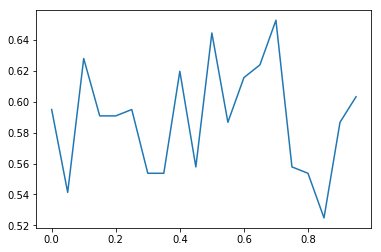

In [29]:
plt.plot(n_range, clf_gs_sgd.cv_results_['mean_test_score'])

### Линейный классификатор на основе SVM

In [30]:
n_range = np.array(range(1,20,1))
tuned_parameters = [{'C': n_range}]
tuned_parameters

[{'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
         18, 19])}]

In [31]:
clf_gs_svm = GridSearchCV(LinearSVC(), tuned_parameters, cv=3,
                      scoring='accuracy')
clf_gs_svm.fit(X_train, Y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
clf_gs_svm.best_params_

{'C': 8}

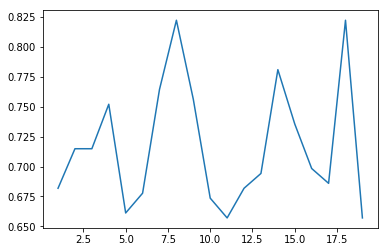

In [33]:
plt.plot(n_range, clf_gs_svm.cv_results_['mean_test_score'])

### Дерево решений

In [34]:
n_range = np.array(range(1,7,1))
tuned_parameters = [{'max_depth': n_range}]
tuned_parameters

[{'max_depth': array([1, 2, 3, 4, 5, 6])}]

In [35]:
clf_gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=1), tuned_parameters,
                          cv=5, scoring='accuracy')
clf_gs_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': array([1, 2, 3, 4, 5, 6])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [36]:
clf_gs_dt.best_params_

{'max_depth': 4}

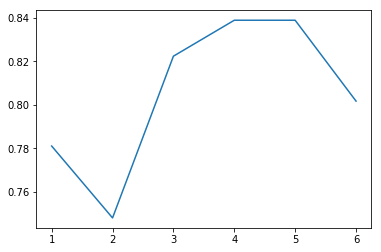

In [37]:
plt.plot(n_range, clf_gs_dt.cv_results_['mean_test_score'])

## Сравнение моделей после подбора гиперпараметров

### Стохастический градиентный спуск

In [38]:
sgd_optimized = SGDClassifier(l1_ratio=clf_gs_sgd.best_params_['l1_ratio']).fit(X_train, Y_train)
predicted_sgd_opt = sgd_optimized.predict(X_test)

In [39]:
accuracy_score(Y_test, predicted_sgd_opt)

0.5409836065573771

In [40]:
balanced_accuracy_score(Y_test, predicted_sgd_opt)

0.5473118279569893

In [41]:
(precision_score(Y_test, predicted_sgd_opt, average='weighted'), 
 recall_score(Y_test, predicted_sgd_opt, average='weighted'))

(0.6180067655477491, 0.5409836065573771)

In [42]:
f1_score(Y_test, predicted_sgd_opt, average='weighted')

0.46160483175151

### Линейный классификатор на основе SVM

In [43]:
svm_optimized = LinearSVC(C=clf_gs_svm.best_params_['C']).fit(X_train, Y_train)
predicted_svm_opt = svm_optimized.predict(X_test)

In [44]:
accuracy_score(Y_test, predicted_svm_opt)

0.7540983606557377

In [45]:
balanced_accuracy_score(Y_test, predicted_svm_opt)

0.7510752688172042

In [46]:
(precision_score(Y_test, predicted_svm_opt, average='weighted'), 
 recall_score(Y_test, predicted_svm_opt, average='weighted'))

(0.790932248654423, 0.7540983606557377)

In [47]:
f1_score(Y_test, predicted_svm_opt, average='weighted')

0.7450239920805513

### Дерево решений

In [48]:
dt_optimized = DecisionTreeClassifier(max_depth=clf_gs_dt.best_params_['max_depth']).fit(X_train, Y_train)
predicted_dt_opt = dt_optimized.predict(X_test)

In [49]:
accuracy_score(Y_test, predicted_dt_opt)

0.7540983606557377

In [50]:
balanced_accuracy_score(Y_test, predicted_dt_opt)

0.7543010752688173

In [51]:
(precision_score(Y_test, predicted_dt_opt, average='weighted'), 
 recall_score(Y_test, predicted_dt_opt, average='weighted'))

(0.7545037898818968, 0.7540983606557377)

In [52]:
f1_score(Y_test, predicted_dt_opt, average='weighted')

0.7540983606557377

Подбор гиперпараметров позволил увеличить точность работы стохастического градиентного спуска и дерева решений. В случае с деревом решений, точность модели увеличилась существенно и после подбора гиперпараметров именно эта модель предоставляет наибольшую точность.